# Linear regression scratchpad

File: noob/minitab_particle_board.ipynb

In [1]:
# Temporary notebook to develop linear regression example using SKLEARN.
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.axes as axes
from sklearn.linear_model import LinearRegression

In [2]:
%matplotlib inline

In [3]:
c = cm.Paired.colors
# c[0] c[1] ... c[11]
# See "paired" in "qualitative colormaps"
# https://matplotlib.org/tutorials/colors/colormaps.html

In [4]:
def despine(ax: axes.Axes) -> None:
    '''
    Remove the top and right spines of a graph.

    There is only one x axis, on the bottom, and one y axis, on the left.
    '''
    for spine in 'right', 'top':
        ax.spines[spine].set_visible(False)

In [5]:
df = pd.read_csv('particle_board.csv')

In [6]:
df.head()

,Density,Stiffness,Temp
0,9.5,14.814,70.610561
1,8.4,17.502,73.348930
2,9.8,14.007,66.153767
3,11.0,19.443,70.057809
4,8.3,7.573,69.339188


In [7]:
df.dtypes

Density      float64
Stiffness    float64
Temp         float64
dtype: object

In [8]:
# values converts it into a numpy array
X_actual = df.iloc[:, 0].values.reshape(-1, 1)
# -1 means that calculate the dimension of rows, but have 1 column
Y_actual = df.iloc[:, 1].values.reshape(-1, 1)

In [9]:
linear_regressor = LinearRegression() # create object for the class

In [10]:
linear_regressor.fit(X_actual, Y_actual)  # perform linear regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [11]:
Y_predicted = linear_regressor.predict(X_actual)  # make predictions

In [12]:
df['Y_predicted'] = Y_predicted
df

,Density,Stiffness,Temp,Y_predicted
0,9.5,14.814,70.610561,12.101302
1,8.4,17.502,73.348930,8.206708
2,9.8,14.007,66.153767,13.163464
3,11.0,19.443,70.057809,17.412112
4,8.3,7.573,69.339188,7.852654
5,9.9,14.191,69.128820,13.517518
6,8.6,9.714,69.833514,8.914816
7,6.4,8.076,64.366166,1.125628
8,7.0,5.304,65.410393,3.249952
9,8.2,10.728,67.767388,7.498600


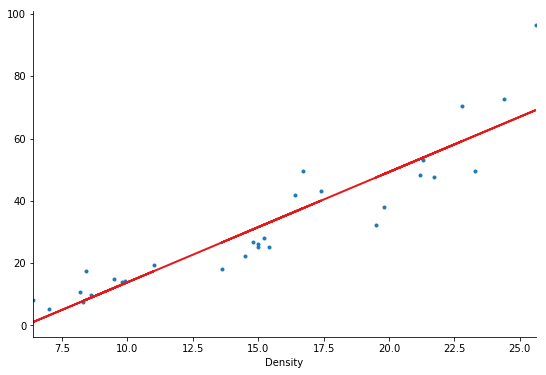

In [13]:
# Scatter plot of actuals and predicted.
ax = df.plot.line(x='Density',
                  y='Stiffness',
                  legend=False,
                  style='.',
                  color=c[1],
                  figsize=(9, 6))
#ax.set_ylabel('Stiffness', fontweight='bold')
#ax.set_xlabel('Density', fontweight='bold')
df.plot(x='Density',
        y='Y_predicted',
        linewidth=2,
        color=c[5],
        legend=False,
        ax=ax)
despine(ax)